In [14]:
%run imports/VacuumGauge_functions.ipynb
%run imports/rbflayer.py

import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [17]:
## definire funzione generica per facilitare la comparison dei risultati

name = ''
model_dir = 'data/models/knn'
model_version = 'knn_002.pkl'
scoring = 'recall' # ['recall', 'accuracy', 'precision']
n_results = -1
model_path = os.path.join(model_dir, model_version)



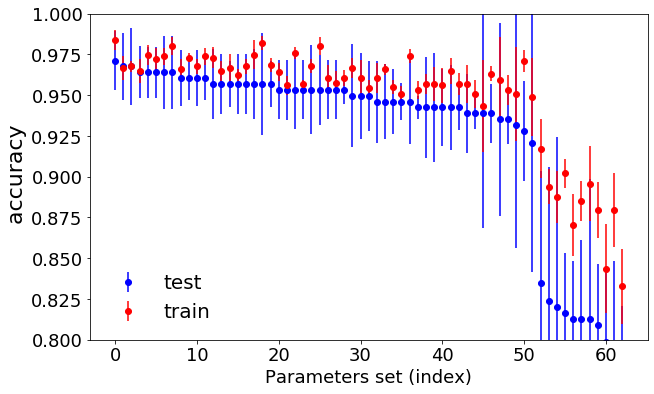

In [18]:
plot_score (model_dir, model_version, scoring='accuracy', n_results=-1, name='')